# Anwendungsbeispiel

![audio](img/audio.jpg)

## Inhalt  
- [Grundlagen von Audiosignal](#1.-Grundlagen-von-Audiosignal)  
- [Filterung mittels FIR-Filter](#2.-Filterung-mittels-FIR-Filter)    
- [Filterung mittels IIR-Filter](#3.-Filterung-mittels-IIR-Filter)    

---- 

Der Zweck eines Filters besteht darin, ein Eingangssignal durch eine bestimmte Operation in ein Ausgangssignal umzuwandeln, nämlich Filterung. Es gibt zwei Möglichkeiten, einen digitalen Filter zu implementieren:  
- Softwareprogrammierung  
- Spezielle Hardware oder allgemeiner digitaler Signalprozessor (DSP)  

Für den Filterentwurf wirken sich unterschiedliche Strukturen auf die Berechnungskomplexität, den Berechnungsfehler und die Stabilität usw. aus. Daher sollte die Filterleistung für bestimmte Anwendungen angemessen berücksichtigt werden, um die Implementierung zu vereinfachen.   

In Bezug auf die Leistung umfasst die IIR-Filterübertragungsfunktion zwei Sätze einstellbarer Faktoren von Null und Pol. Die einzige Einschränkung für den Pol liegt im Einheitskreis. Daher kann eine niedrigere Ordnung verwendet werden, um eine hohe Selektivität zu erhalten, eine kleine Anzahl von Speichereinheiten wird verwendet, ein geringer Rechenaufwand und eine hohe Effizienz. Dieser hohe Wirkungsgrad geht jedoch zu Lasten der Nichtlinearität der Phase. Je besser die Selektivität ist, desto schwerwiegender ist die Nichtlinearität der Phase. Der Pol der FIR-Filterübertragungsfunktion ist am Ursprung fixiert und kann seine Leistung nur durch Ändern der Nullposition ändern. Um eine hohe Selektivität zu erreichen, muss daher eine höhere Ordnung verwendet werden. Für denselben Filterdesignindex kann die erforderliche Ordnung des FIR-Filters vielmal höher sein als die des IIR-Filters, so dass die Kosten höher und die Signalverzögerung ist auch größer.

In diesem Submodul werden bestimmte Frequenzkomponenten eines Eingangssignals durch verschiedene Filter entfernt, um die Eigenschaften zu vergleichen. Genauer gesagt, wir werden Bandsperrfilter zur Rauschunterdrückung von Audiosignal mit unterschiedlichen Methoden implementieren und die Ergebnisse vergleichen. Die Daten des Audiosignals (akustik.wav) finden Sie unter dem Ordner 'data'. 

## 1. Grundlagen von Audiosignal

#### 1.1 Ablesen

Um Audiodateien zu bearbeiten, müssen wir sie zuerst ablesen. Es gibt mehrere Methoden:

```python
'''
Beispiel: Ablesen Audiodatei durch verschiedene Methoden
'''
from scipy.io import wavfile
import librosa

path = 'data/akustik.wav'

# 1. wavfile:
sr, audio = wavfile.read(path)

# 2. wave:
wavefile = wave.open(path,'rb')
audio = wf.readframes(1024)

# 3. librosa:
audio, sr = librosa.load(path)
```

Hier benutzen wir einfach die erste Methode:

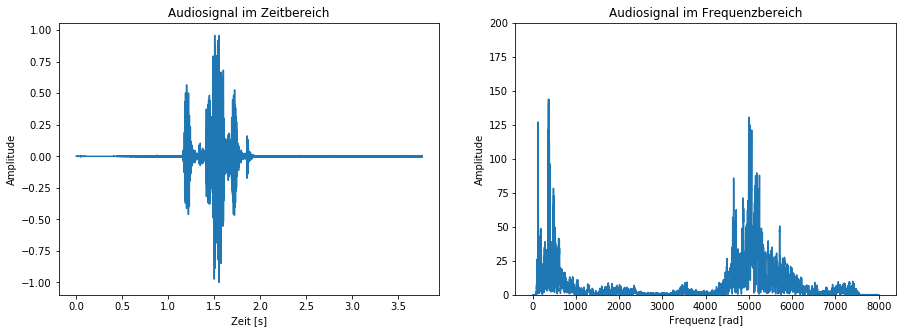

In [1]:
'''
Beispiel: Audiodatei Ablesen und Visualisieren
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.io import wavfile

# Datei ablesen 
sr, audio = wavfile.read('data/akustik.wav')  # Sample Rate, Audiosignal im Array-Form
audio = audio/np.max(np.abs(audio))   # Normalisierung

# Initiale Daten
fs_Hz = sr  # Abtrastfrequenz
L = len(audio)  # Länge des Audiosignals
T = L/fs_Hz - 1/fs_Hz  # Zeit
t = np.linspace(0, T, L)  # Zeitbereich
f_Hz = np.linspace(0, fs_Hz/2, int(L/2))  # Frequenzbereich

# Spectrale
audio_fft = fftpack.fft(audio)

# plot
plt.subplot(121)
plt.title('Audiosignal im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, audio)
plt.subplot(122)
plt.title('Audiosignal im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(audio_fft[:int(L/2)]))
plt.gcf().set_size_inches(15, 5)
plt.show()

#### 1.2 Abspielen

Es gibt auch verschiedene Möglichkeiten, Audiosignale mit Python abzuspielen. Zur Verwendung stellen Sie sicher, dass Sie die entsprechenden Pakete mittels "pip install" heruntergeladen haben, z.B.:     
```python
pip install scipy
```

- [playsound](https://pypi.org/project/playsound/)   
Das PlaySound-Modul ist ein plattformübergreifendes Modul, das Audiodateien abspielen kann. Dies hat keine Abhängigkeiten. Man kann es einfach installieren und ausführen:

In [2]:
from playsound import playsound
playsound('data/akustik.wav')

- [pyaudio](https://people.csail.mit.edu/hubert/pyaudio/docs/)  
 Die offizielle API zum Abspielen von Audio und Aufnahme wird bereitgestellt:

In [3]:
import pyaudio
import wave

# Datei ablesen 
wf = wave.open('data/akustik.wav', 'rb')
audio = wf.readframes(1024)

# Audio Interface
play = pyaudio.PyAudio()

# Abspielen
stream = play.open(format=play.get_format_from_width(wf.getsampwidth()),  channels=wf.getnchannels(), rate=wf.getframerate(), output=True)
while audio != b'':
    stream.write(audio)
    audio = wf.readframes(1024)
stream.stop_stream()
stream.close()

# Beenden
play.terminate()

- [IPython.display](https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html)  
Um Audio in einem Jupiter-Notebook abzuspielen, können Sie sogar die Funktion IPython.display verwenden:

In [4]:
import IPython.display as ipd
ipd.Audio('data/akustik.wav')

- [simpleaudio](https://simpleaudio.readthedocs.io/en/latest/)  
Mit simpleaudio können wir sowohl wav-Dateien als auch NumPy-Arrays abspielen, was wir demnächst benutzen können:   

In [5]:
'''
Beispiel: wav-Dateien abspielen
'''
import simpleaudio as sa

# Datei ablesen
wave_obj = sa.WaveObject.from_wave_file('data/akustik.wav')

# abspielen
play_obj = wave_obj.play()
play_obj.wait_done()

In [6]:
'''
Beispiel: NumPy-Arrays (Audiosignal) abspielen
'''
import simpleaudio as sa
from scipy.io import wavfile

# Datei ablesen 
sr, audio = wavfile.read('data/akustik.wav')

# abspielen
play_obj = sa.play_buffer(audio, 1, 2, sr)
play_obj.wait_done()

In [7]:
'''
Beispiel: NumPy-Arrays (Sinussignal) abspielen
'''
import numpy as np
import simpleaudio as sa

# Sinussignal erstellen
t = np.linspace(0, 3, sr)
s_sin = np.sin(440 * np.pi * t)

# Werte im 16-Bit-Bereich beschränken
sound = s_sin * (2**15 - 1) / np.max(np.abs(s_sin))
# in 16-Bit-Daten konvertieren
sound = sound.astype(np.int16)

# abspielen
play_obj = sa.play_buffer(sound, 1, 2, int(sr/2))
play_obj.wait_done()

#### 1.3 Geräusch addieren

Zuerst addieren wir ein solches Sinussignal als Geräusch zur Filterung:

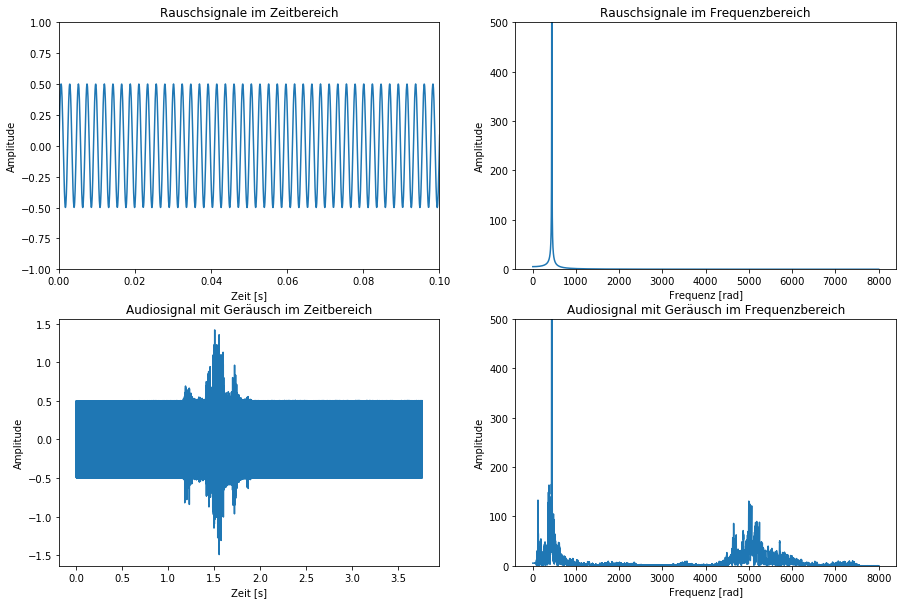

In [8]:
'''
Beispiel: Geräusche addieren, visualisieren und abspielen
'''
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
from scipy import fftpack
from scipy import signal
from scipy.io import wavfile

# Datei ablesen (originales Audiosignal)
sr, audio = wavfile.read('data/akustik.wav')
audio = audio/np.max(np.abs(audio)) 

# Initiale Daten
fs_Hz = sr  # Abtrastfrequenz
fn_Hz = 440  # Geräuschfrequenz
L = len(audio)  # Länge des Audiosignals
T = L/fs_Hz - 1/fs_Hz  # Zeitraum
t = np.linspace(0, T, L)  # Zeitbereich
f_Hz = np.linspace(0, fs_Hz/2, int(L/2))  # Frequenzbereich

# Sinussignale als Geräusch
noise = 1/2 * np.sin(fn_Hz * 2*np.pi * t)
noise_fft = fftpack.fft(noise)

# Signal zur Filterung
s = audio + noise  # Additives Geräusch
S = fftpack.fft(s)  # Frequenzgang

# Fensterung (optional)
wd = signal.get_window('hanning', L)
s_windowed = s * wd

# plot
plt.subplot(221)
plt.title('Rauschsignale im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.xlim(0, 0.1)
plt.ylabel('Amplitude') 
plt.ylim(-1, 1)
plt.plot(t, noise)
plt.subplot(222)
plt.title('Rauschsignale im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 500)
plt.plot(f_Hz, np.abs(noise_fft[:int(L/2)]))
plt.subplot(223)
plt.title('Audiosignal mit Geräusch im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s)
plt.subplot(224)
plt.title('Audiosignal mit Geräusch im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 500)
plt.plot(f_Hz, np.abs(S[:int(L/2)]))
plt.gcf().set_size_inches(15, 10)
plt.show()


# Abspielen
sound = (s * (2**15 - 1) / np.max(np.abs(s))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)
play_obj.wait_done()

----

## 2. Filterung mittels FIR-Filter

#### 2.1 FIR-Filter mittels IDFT

Jetzt entwerfen wir einen Bandsperrfilter mittels IDFT, um das Sinussignal von Audiosignal zu entfernen. 

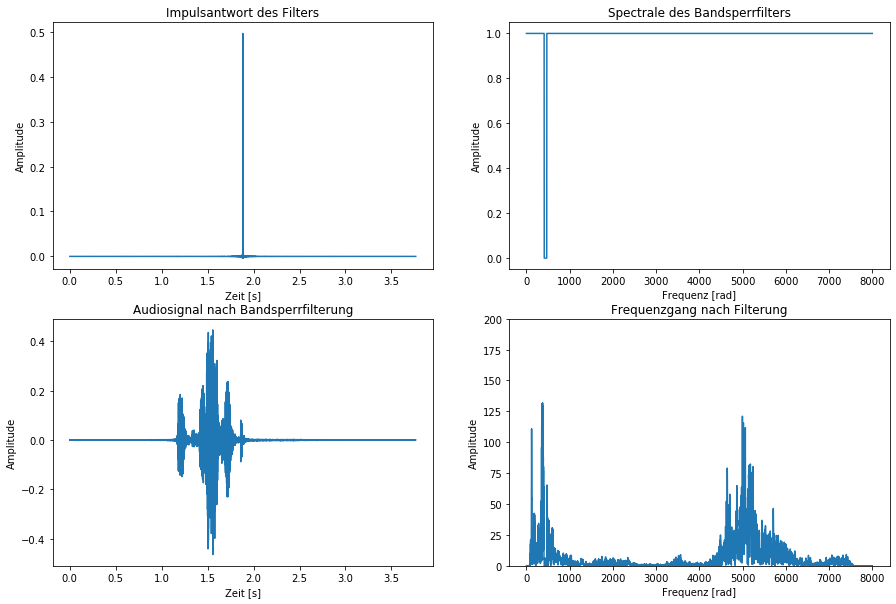

In [9]:
'''
Beispiel: Rauschunterdrückung mittels selbst definierten FIR-Bandsperrfilters 
'''
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
from scipy import fftpack
from scipy import signal

# Filter
bw = 30  # Bandbreite
H = np.where((f_Hz < (fn_Hz+bw)) & (f_Hz > (fn_Hz-bw)), 0, 1)  
h = np.fft.ifftshift(fftpack.ifft(H, L))   

# Filterung
s_filtered = signal.convolve(s_windowed, h, 'same')  # Faltung
S_filtered = fftpack.fft(s_filtered)

# Plot
plt.subplot(221)
plt.title('Impulsantwort des Filters')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, np.real(h))
plt.subplot(222)
plt.title('Spectrale des Bandsperrfilters')
plt.xlabel('Frequenz [rad]') 
#plt.xlim(0, 1000)
plt.ylabel('Amplitude') 
plt.plot(f_Hz, H)
plt.subplot(223)
plt.title('Audiosignal nach Bandsperrfilterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, np.real(s_filtered))
plt.subplot(224)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))
plt.gcf().set_size_inches(15, 10)
plt.show()

# Abspielen
sound = (np.real(s_filtered) * (2**15 - 1) / np.max(np.abs(s_filtered))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)

#### 2.2 FIR-Filter mittels __firwin()__  
Für solche Anwendungen können wir aber auch Filter wie [signal.firwin()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) in __[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html)__ direkt verwenden. Das Ergebnis ist ähnlich:

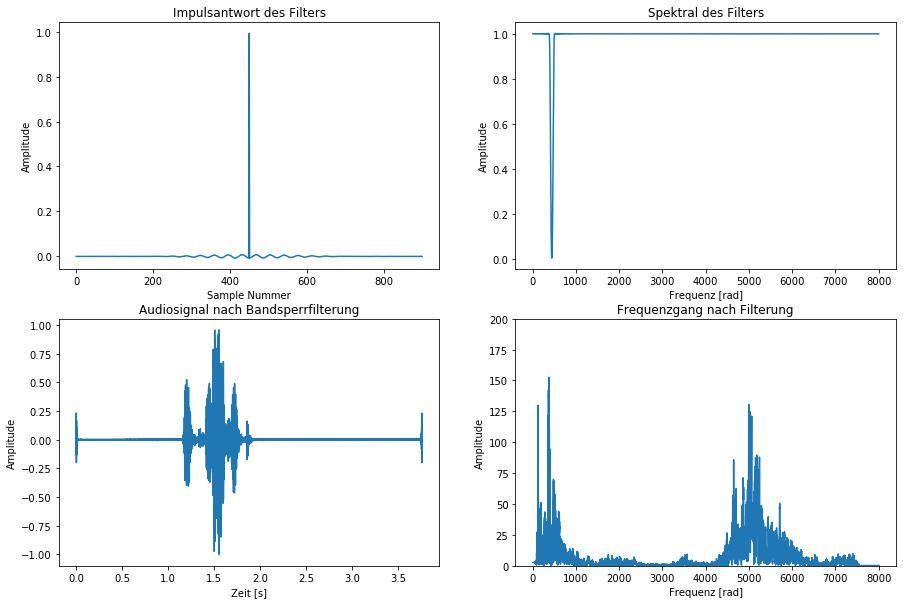

In [10]:
'''
Aufgabe: Rauschunterdrückung mittels signal.firwin() 
'''
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
from scipy import fftpack
from scipy import signal
  
# Parameter
bw = 30  # Bandbreite
n = 901  # Ordnung
wn = [(fn_Hz-bw), (fn_Hz+bw)]

# Filterung mit Fenster
h_fir = signal.firwin(n, wn, window='hamming', fs=fs_Hz)
H_fir = fftpack.fft(h_fir, L)  # Spektral des Filters
s_fir = signal.convolve(s, h_fir, 'same')  # Faltung
S_fir = fftpack.fft(s_fir)  # Spektral des Signals

# plot
plt.subplot(221)
plt.title('Impulsantwort des Filters')
plt.xlabel('Sample Nummer') 
plt.ylabel('Amplitude') 
plt.plot(h_fir)
plt.subplot(222)
plt.title('Spektral des Filters')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_fir[:int(L/2)]))
plt.subplot(223)
plt.title('Audiosignal nach Bandsperrfilterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_fir)
plt.subplot(224)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_fir[:int(L/2)]))
plt.gcf().set_size_inches(15, 10)
plt.show()

# Abspielen
sound = (np.real(s_fir) * (2**15 - 1) / np.max(np.abs(s_fir))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)

Vom Ergebnis können wir finden, dass die Ordnung fast über 1000 ist. D.h., um das Sinussignal zu entfernen, braucht man eine sehr hohe Ordnung zu verwenden, was bedeutet die große Anforderung von Speicherplatz, einen goßen Rechenaufwand und eine niedrige Effizienz.  

Anschließend verwenden wir IIR-Filter zur Rauschunterdrückung.

----

## 3. Filterung mittels IIR-Filter

#### 3.1 Butterworth Filter

- Butterworth Filterentwurf mit Ordnung=3

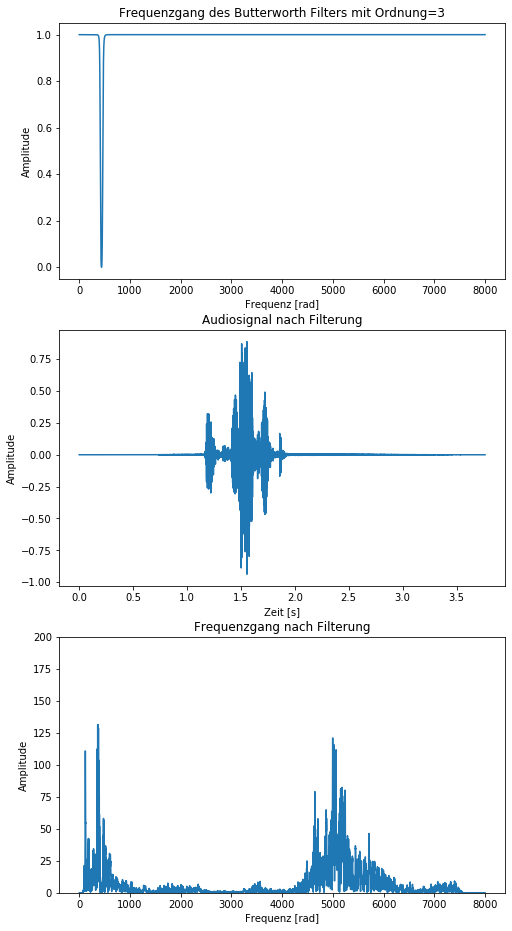

In [11]:
'''
Beispiel: Rauschunterdrückung mittels IIR-Bandsperrfilters (Butterworth)
'''
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
from scipy import fftpack
from scipy import signal

# Parameter
bw = 30  # Bandbreite
n = 3  # Ordnung 
wn = [fn_Hz-bw, fn_Hz+bw]

# Filterung 
sos = signal.butter(n, wn, 'bs', analog=False, fs=fs_Hz, output='sos')
w, H_butt = signal.sosfreqz(sos, int(L/2), fs=fs_Hz)
s_butt = signal.sosfilt(sos, s_windowed)
S_butt = fftpack.fft(s_butt)

# plot
plt.subplot(311)
plt.title('Frequenzgang des Butterworth Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_butt[:int(L/2)]))
plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_butt)
plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_butt[:int(L/2)]))
plt.gcf().set_size_inches(8, 16)
plt.show()

# Abspielen
sound = (np.real(s_butt) * (2**15 - 1) / np.max(np.abs(s_butt))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)

- Butterworth Filterentwurf mit Ordnungselektion

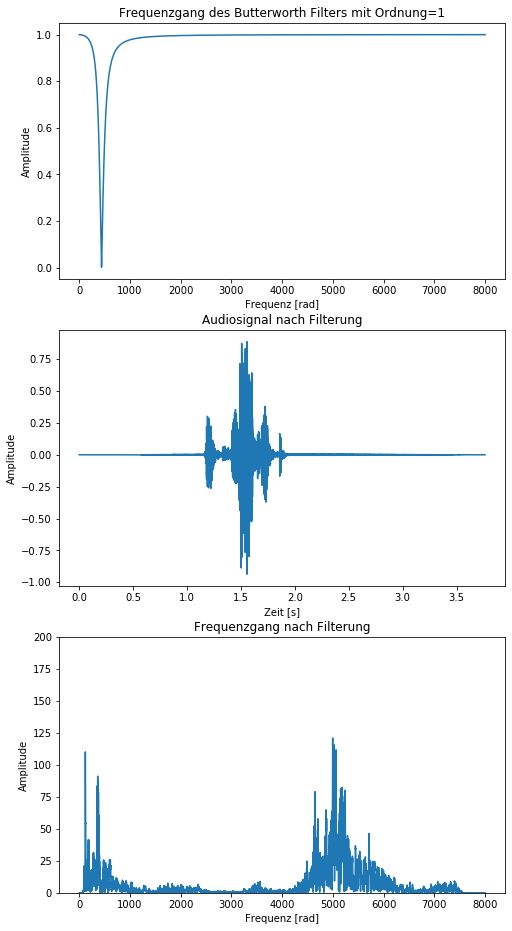

In [12]:
'''
Aufgabe: Rauschunterdrückung mittels IIR-Bandsperrfilters (Butterworth)
'''
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
from scipy import fftpack
from scipy import signal

# Ordnungselektion
bw = 30  # Bandbreite
n, wn = signal.buttord([fn_Hz-bw, fn_Hz+bw], [fn_Hz, fn_Hz], 10, 40, False, fs_Hz)

# Filterung 
sos = signal.butter(n, wn, 'bs', False, 'sos', fs_Hz)
w, H_butt = signal.sosfreqz(sos, int(L/2), fs=fs_Hz)
s_butt = signal.sosfilt(sos, s_windowed)
S_butt = fftpack.fft(s_butt)

# plot
plt.subplot(311)
plt.title('Frequenzgang des Butterworth Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_butt[:int(L/2)]))
plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_butt)
plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_butt[:int(L/2)]))
plt.gcf().set_size_inches(8, 16)
plt.show()

# Abspielen
sound = (np.real(s_butt) * (2**15 - 1) / np.max(np.abs(s_butt))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)

Dadurch kann man herausfinden, es ist sogar schon ausreichend, die Ordnung des IIR-Filters gleich 1 ist, während die des FIR-Filters fast 1000 ist.

### 3.2 Chebyshev Filter

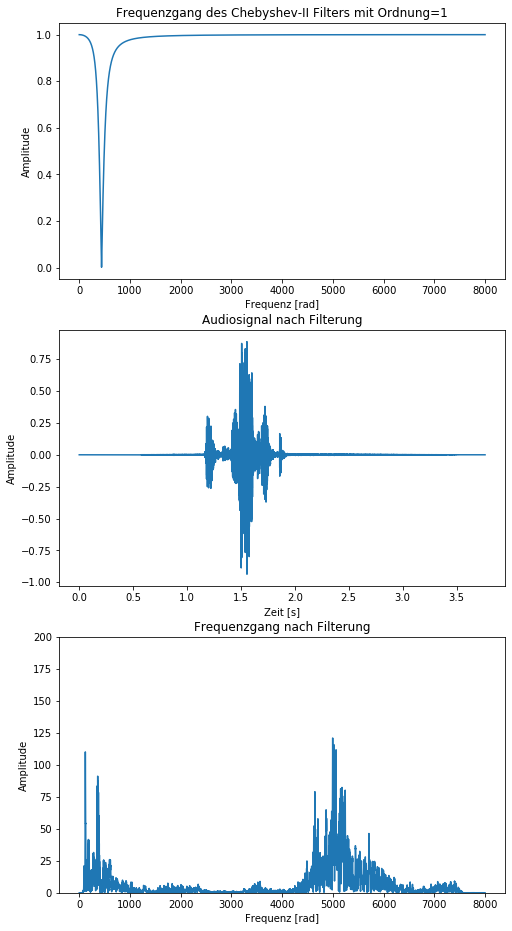

In [13]:
'''
Aufgabe: Rauschunterdrückung mittels IIR-Bandsperrfilters (Chebyshev II)
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import signal

# Ordnungselektion
bw = 30  # Bandbreite
n, wn = signal.cheb2ord([fn_Hz-bw, fn_Hz+bw], [fn_Hz, fn_Hz], 10, 60, False, fs_Hz)

# Filterung
sos = signal.cheby2(1, 60, wn, 'bs', False, 'sos', fs_Hz)
w, H_cheby = signal.sosfreqz(sos, int(L/2), fs=fs_Hz)
s_cheby = signal.sosfilt(sos, s_windowed)
S_cheby = fftpack.fft(s_cheby)

# plot
plt.subplot(311)
plt.title('Frequenzgang des Chebyshev-II Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_cheby[:int(L/2)]))
plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_cheby)
plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_cheby[:int(L/2)]))
plt.gcf().set_size_inches(8, 16)
plt.show()

# Abspielen
sound = (np.real(s_cheby) * (2**15 - 1) / np.max(np.abs(s_cheby))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)

Zum Schluß können wir dieses Signal wieder als .wav-Datei speichern:

In [14]:
'''
Beispiel: Daten in eine wav-Datei schreiben
'''
import wave
import numpy as np
from scipy.io import wavfile

# Audiodaten schreiben
wavfile.write('data/akustik_filtered.wav', fs_Hz, np.real(s_filtered))

----

### References

1. Titelbild von [Encarni Mármol](https://lda-audiotech.com/en/2018/10/30/how-to-digitize-analog-audio/)  
2. [Play sound in Python](https://pythonbasics.org/python-play-sound/)